<a href="https://colab.research.google.com/github/jasonstoy/TensorFlow/blob/main/6.%20Classification%20with%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

tf.random.set_seed(5)
np.random.seed(5)

print(tf.__version__)

2.6.0


In [2]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [3]:
# practice data
from sklearn.datasets import make_circles

In [4]:
# make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=5)

In [5]:
X[:10]

array([[ 0.75402483,  0.43755921],
       [ 0.81060642,  0.15734353],
       [-0.78916909,  0.63340529],
       [ 1.05156284,  0.10546473],
       [-0.92082444, -0.33689373],
       [-0.34823734,  0.76256356],
       [-0.20076177,  0.82028053],
       [-0.79876041, -0.13158886],
       [-0.83753668,  0.6090758 ],
       [-0.74680628,  0.2675246 ]])

In [6]:
y[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [7]:
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "y":y})

In [8]:
circles

,X0,X1,y
0,0.754025,0.437559,1
1,0.810606,0.157344,1
2,-0.789169,0.633405,0
3,1.051563,0.105465,0
4,-0.920824,-0.336894,0
...,...,...,...
995,0.300141,-0.943509,0
996,0.048661,0.993403,0
997,-0.640805,0.461174,1
998,-0.845777,0.558366,0


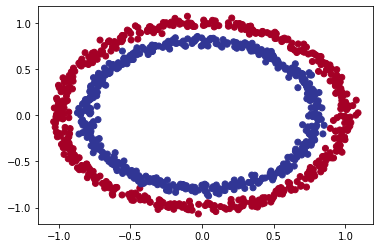

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [11]:
X_train.shape

(800, 2)

In [44]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(2)))
model.add(tf.keras.layers.Dense(30,activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics=["accuracy"])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [45]:
# history = model.fit(X_train
#                     , y_train
#                     , epochs=100
#                     , verbose=0
#                     , callbacks=[lr_scheduler])

history = model.fit(X_train
                    , y_train
                    , epochs=100
                    , verbose=0)

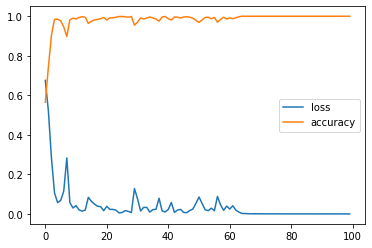

In [46]:
pd.DataFrame(history.history).plot()

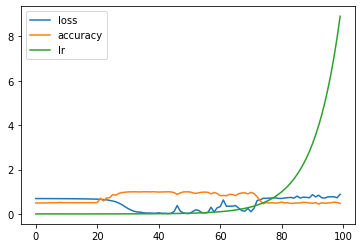

In [42]:
pd.DataFrame(history.history).plot()

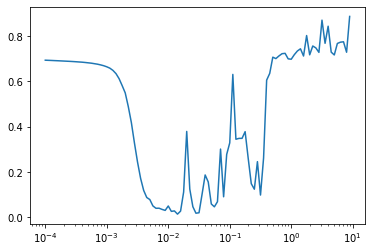

In [43]:
#optimize lr by lr vs loss curve
plt.semilogx(history.history["lr"], history.history["loss"])
# plt.xlim(0, 0.1)

In [47]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000


[0.0010740795405581594, 1.0]

In [50]:
y_pred = model.predict(X_test)

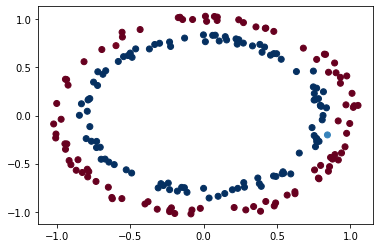

In [68]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap=plt.cm.RdBu)

In [69]:
## madewithml repo
def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1
  y_min, y_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

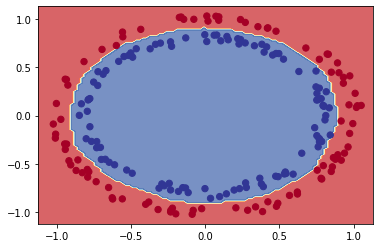

In [70]:
plot_decision_boundary(model, X_test, y_test)

In [48]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, tf.round(y_pred))

array([[ 95,   0],
       [  0, 105]])

In [72]:
import itertools

cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
cm_norm

array([[1., 0.],
       [0., 1.]])

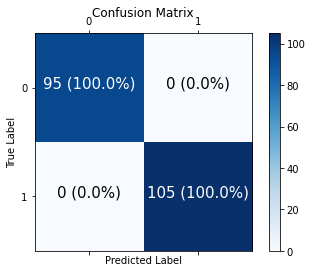

In [79]:
n_classes = cm.shape[0]

fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max()+cm.min()) / 2.

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)